In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("wb.csv")
df = data.drop(columns=["Time", "Time Code"])
df.columns = ["CN", "CC", "GDP", "PT", "LE"]

In [5]:
df["GDP"].replace("..", np.nan, inplace=True)
df["PT"].replace("..", np.nan, inplace=True)
df["LE"].replace("..", np.nan, inplace=True)
df.dropna(inplace=True)
df

,CN,CC,GDP,PT,LE
0,Afghanistan,AFG,6275.91015625,34656032,63.673
1,Albania,ALB,28602.626953125,2876101,78.345
2,Algeria,DZA,52936.99609375,40606052,76.078
5,Angola,AGO,15748.9326171875,28813463,61.547
7,Argentina,ARG,45039.30859375,43847430,76.577
8,Armenia,ARM,20792.01171875,2924816,74.618
10,Australia,AUS,89515.015625,24210809,82.5
11,Austria,AUT,90842.6328125,8736668,80.890243902439
12,Azerbaijan,AZE,33202.32421875,9757812,72.026
13,"Bahamas, The",BHS,40888.51171875,391232,75.675


In [6]:
df["GDP"] = df["GDP"].convert_objects(convert_numeric=True)
df["PT"] = df["PT"].convert_objects(convert_numeric=True)
df["LE"] = df["LE"].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel packag

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[["GDP","PT","LE"]])
df[["GDP","PT","LE"]] = scaler.transform(df[["GDP","PT","LE"]])

/home/maksat/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


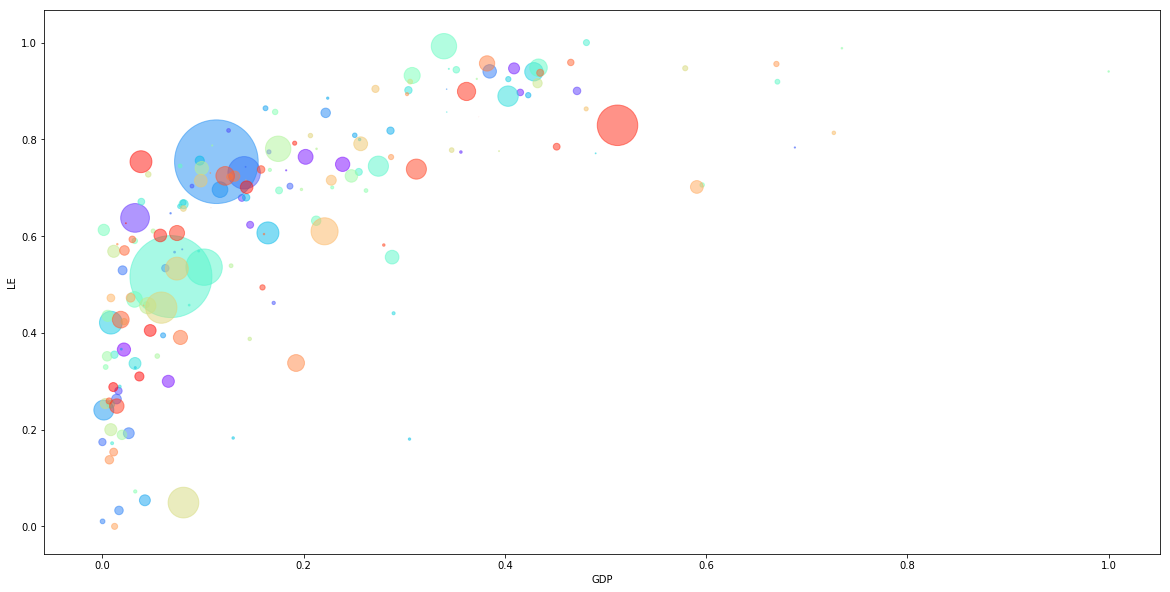

In [127]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(df)))
plt.figure(figsize=(20,10))
plt.scatter(x=df["GDP"], y=df["LE"], s=df["PT"]*7000, alpha=0.5, color=colors)
plt.xlabel("GDP")
plt.ylabel("LE")
plt.show()